In [1]:
import pandas as pd

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
labelfruitmap = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
labelfruitmap

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
from sklearn.model_selection import train_test_split

X = fruits[['height', 'width', 'mass', 'color_score']]
Y = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [6]:
print(X.shape,' ', Y.shape,' ', X_train.shape,' ', Y_train.shape,' ', X_test.shape,' ', Y_test.shape)

(59, 4)   (59,)   (44, 4)   (44,)   (15, 4)   (15,)


In [7]:
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


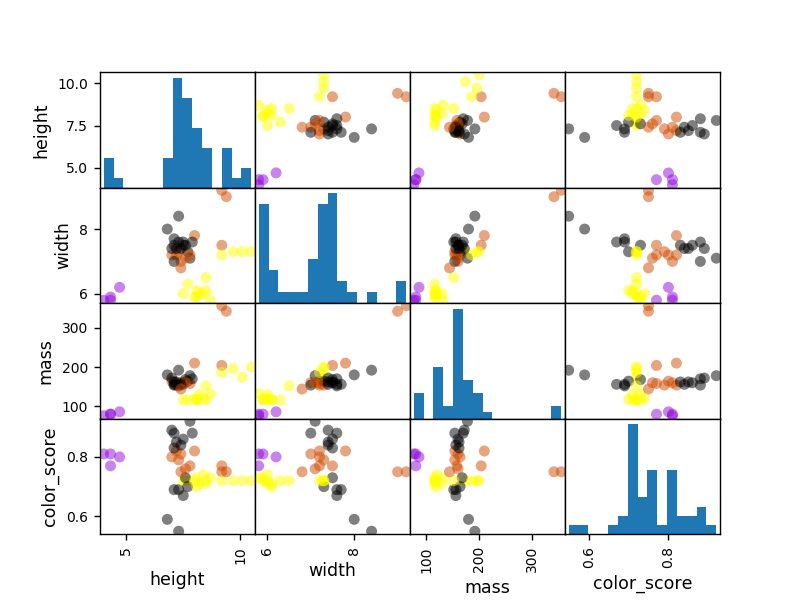

In [8]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X_train, c = Y_train, marker = 'o', s=40, hist_kwds={'bins':15}, cmap = cmap)

<IPython.core.display.Javascript object>


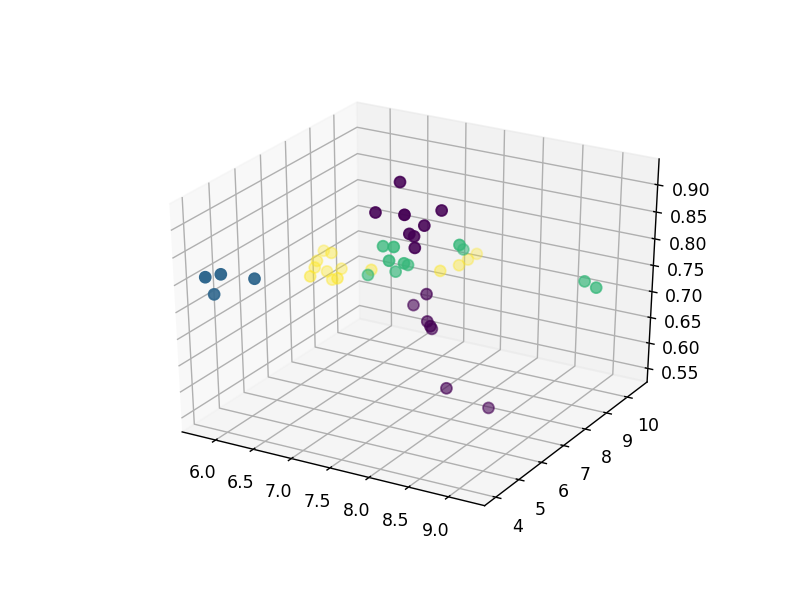

In [9]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure()

ax = plt.subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = Y_train, marker = 'o', s = 40)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [11]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
knn.score(X_test, Y_test)

0.5333333333333333

In [13]:
fp = knn.predict([[18, 8, 180, 0.5]])
labelfruitmap[fp[0]]

'apple'

<IPython.core.display.Javascript object>


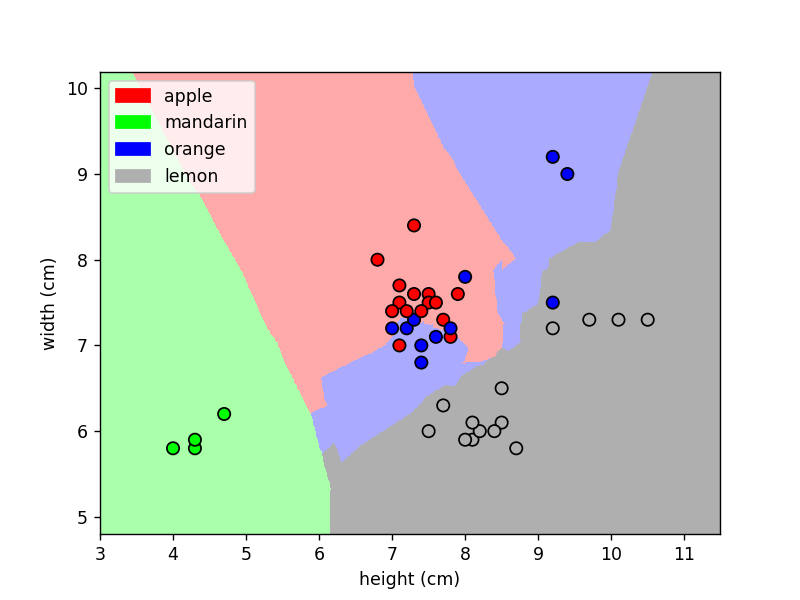

In [14]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, Y_train, 5, 'uniform')

In [15]:
import re, sys
print("{:15s} {}".format("python", re.sub(r' \|(\n|.)*', '', sys.version)))
import matplotlib
print("{:15s} {}".format("matplotlib", matplotlib.__version__))
import numpy
print("{:15s} {}".format("numpy", numpy.__version__))
import pandas
print("{:15s} {}".format("pandas", pandas.__version__))

python          3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
matplotlib      3.1.3
numpy           1.18.1
pandas          1.0.1


<IPython.core.display.Javascript object>


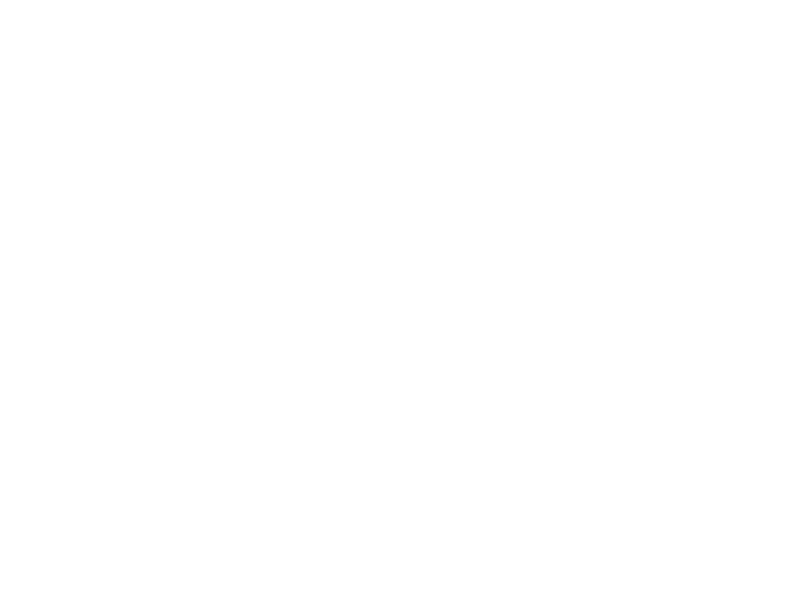

<IPython.core.display.Javascript object>


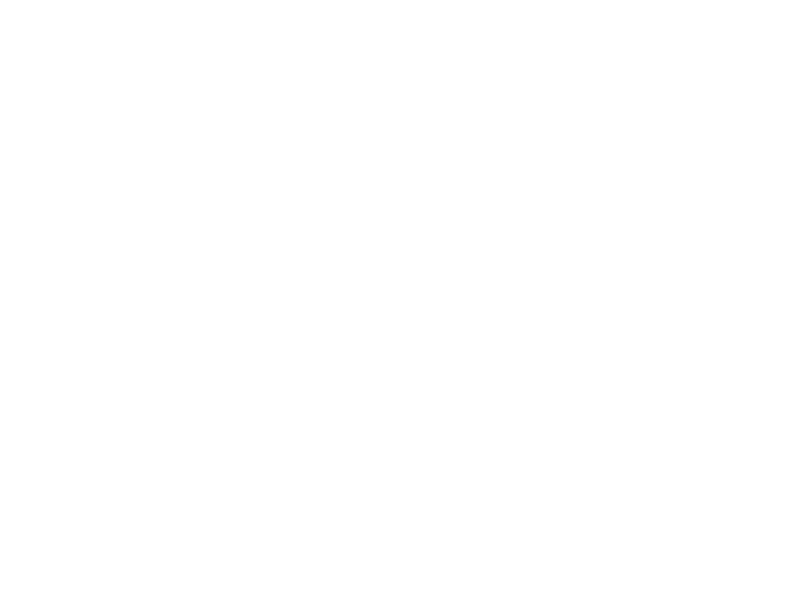

<IPython.core.display.Javascript object>


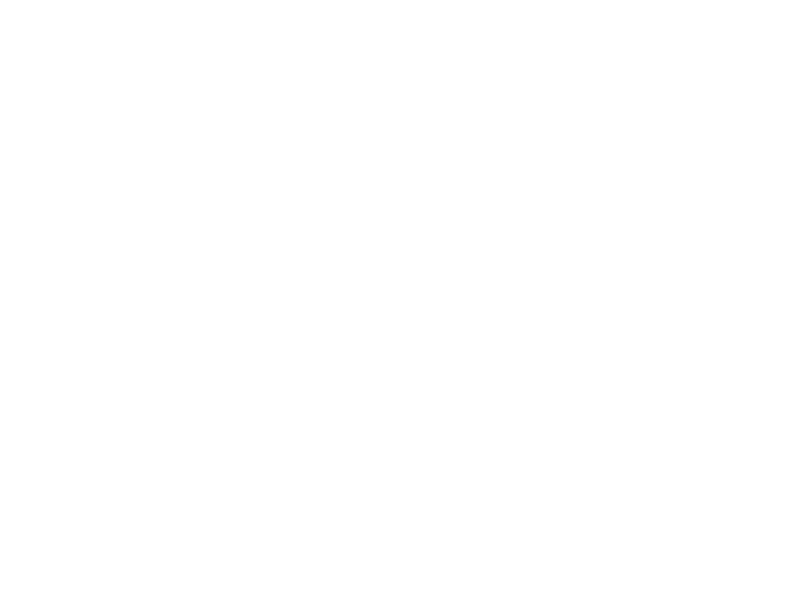

<IPython.core.display.Javascript object>


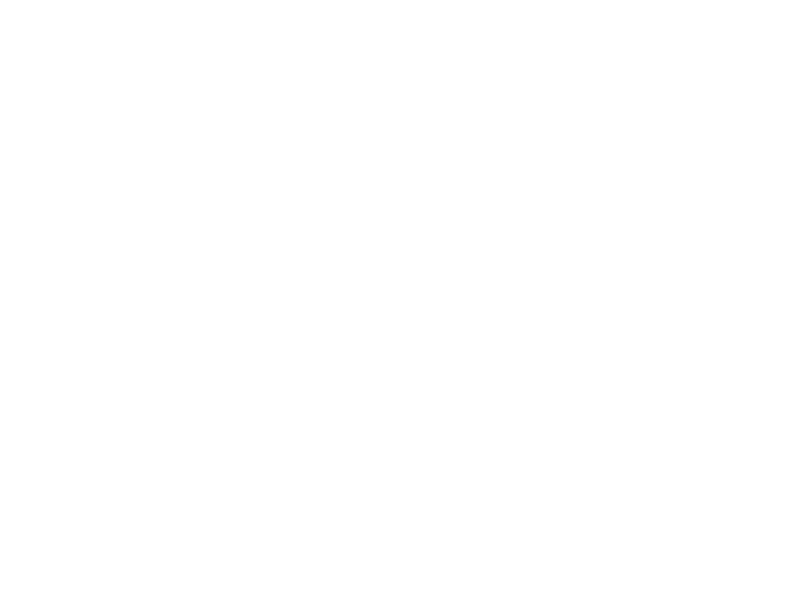

<IPython.core.display.Javascript object>


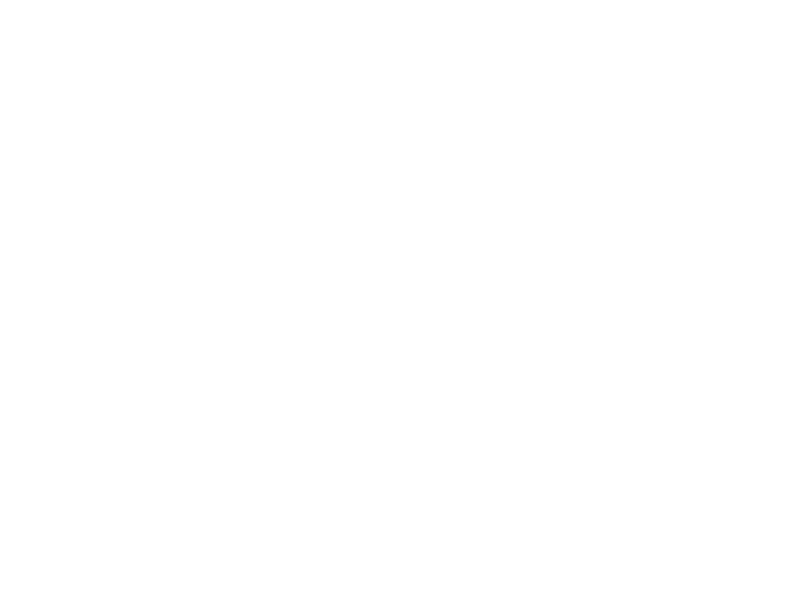

<IPython.core.display.Javascript object>


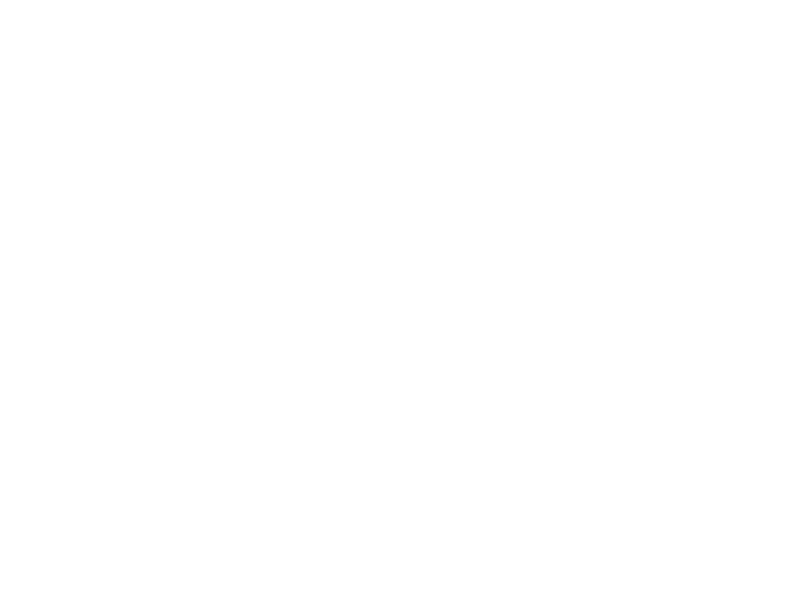

<IPython.core.display.Javascript object>


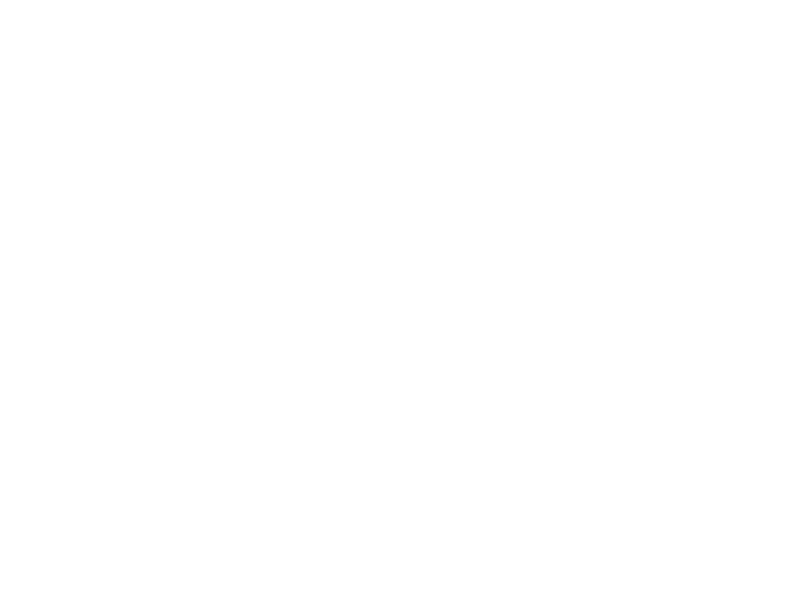

<IPython.core.display.Javascript object>


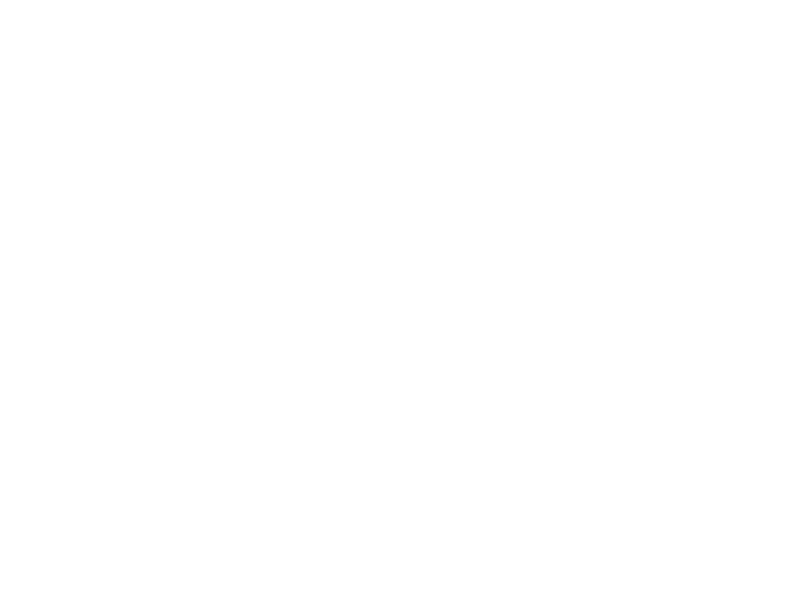

<IPython.core.display.Javascript object>


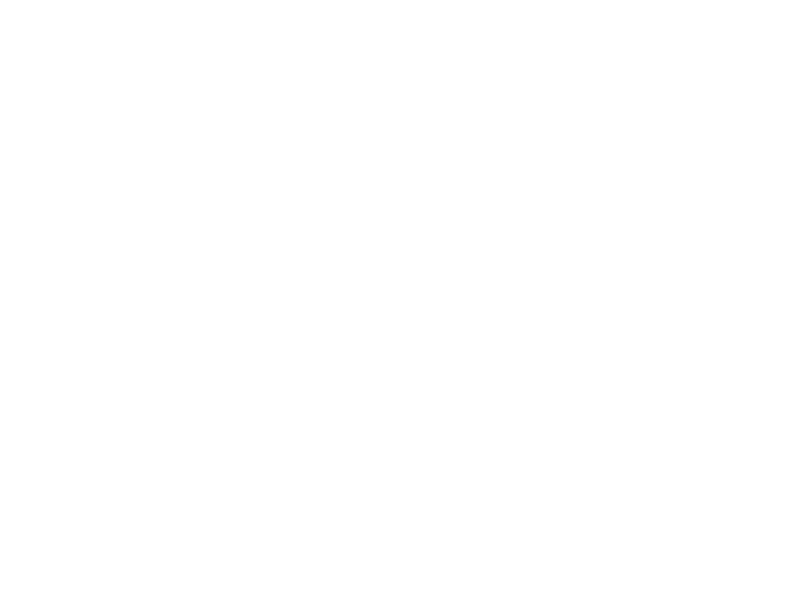

<IPython.core.display.Javascript object>


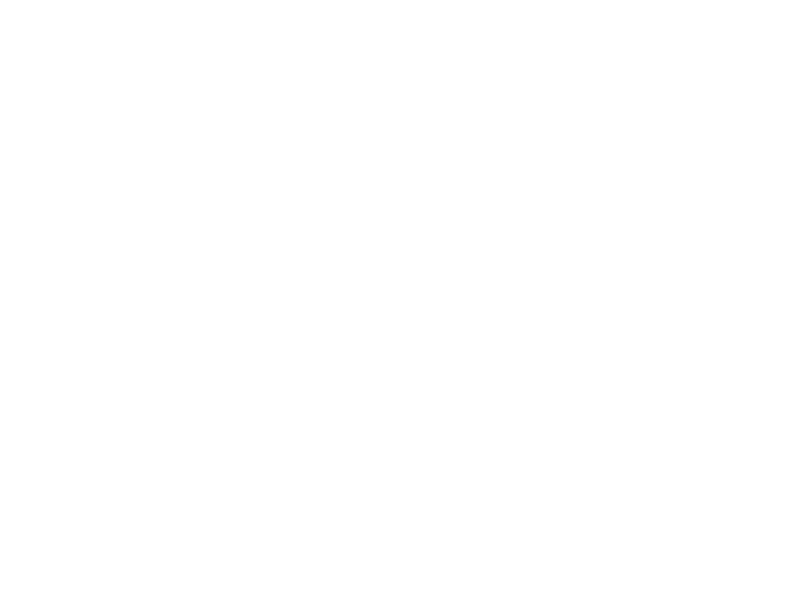

<IPython.core.display.Javascript object>


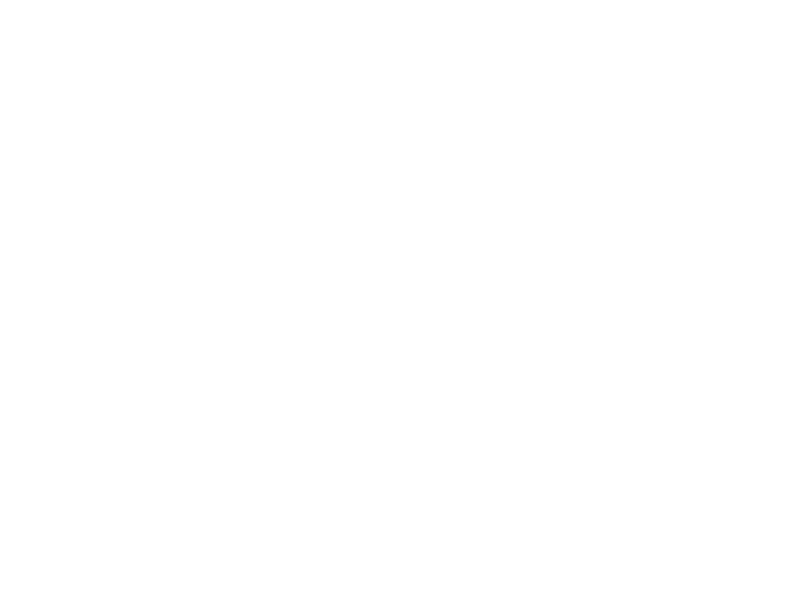

<IPython.core.display.Javascript object>


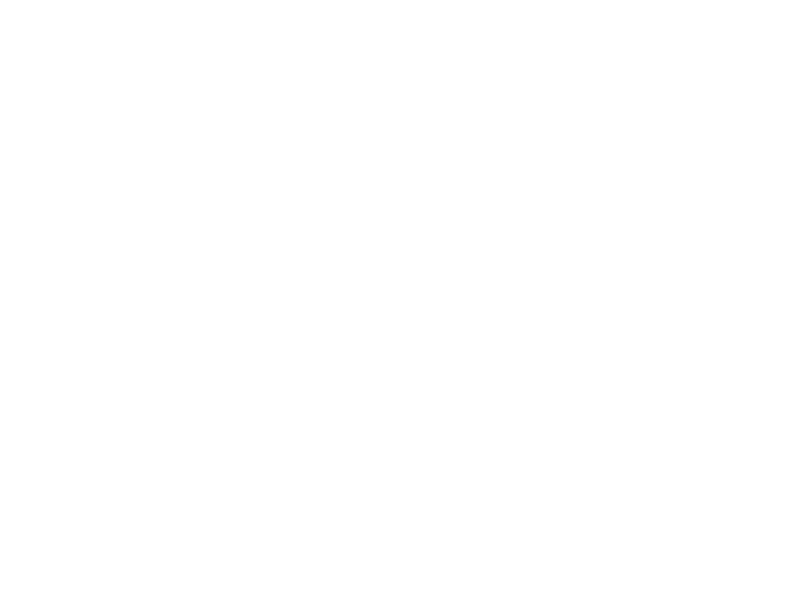

<IPython.core.display.Javascript object>


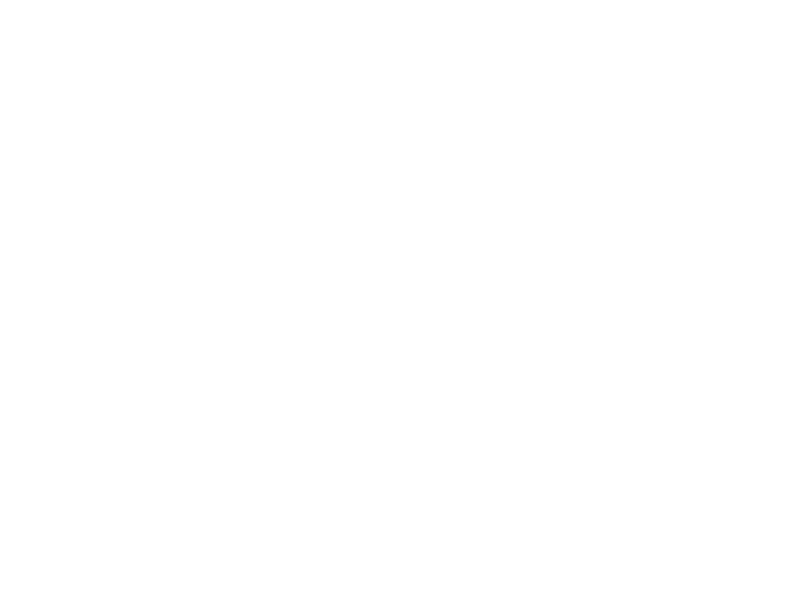

<IPython.core.display.Javascript object>


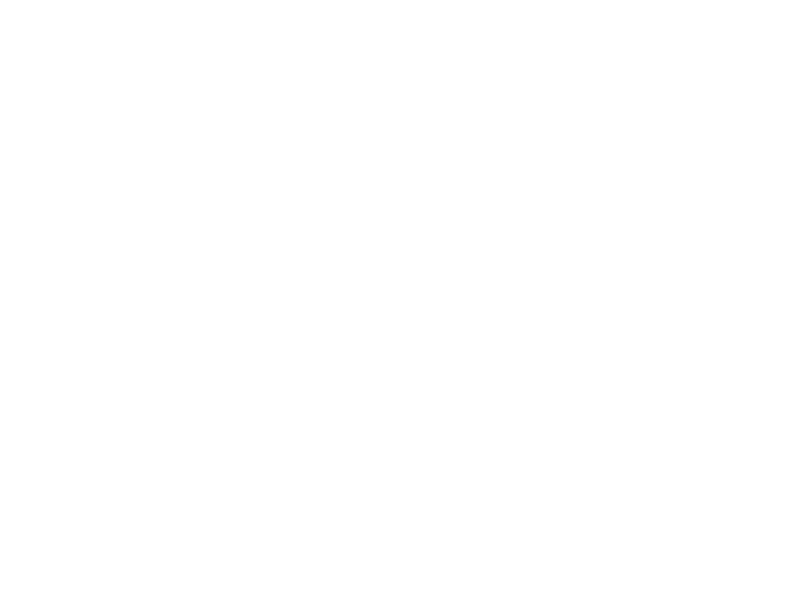

<IPython.core.display.Javascript object>


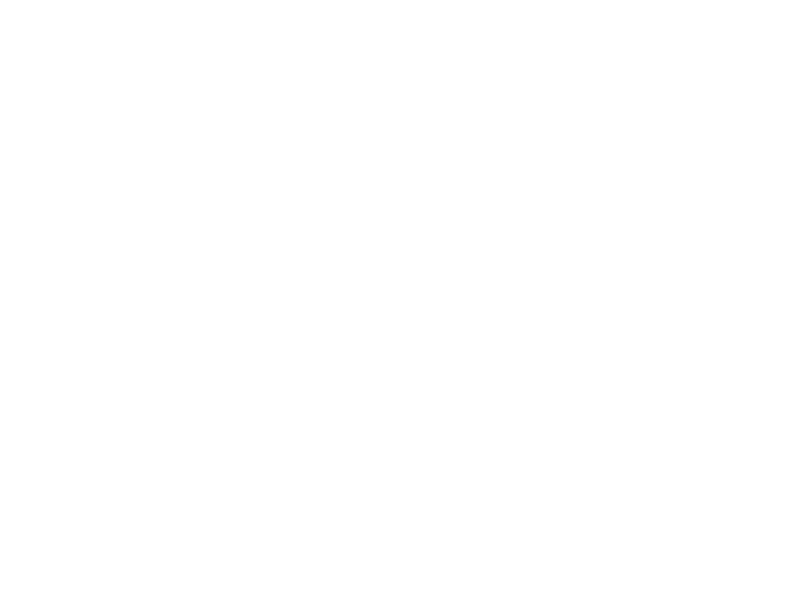

<IPython.core.display.Javascript object>


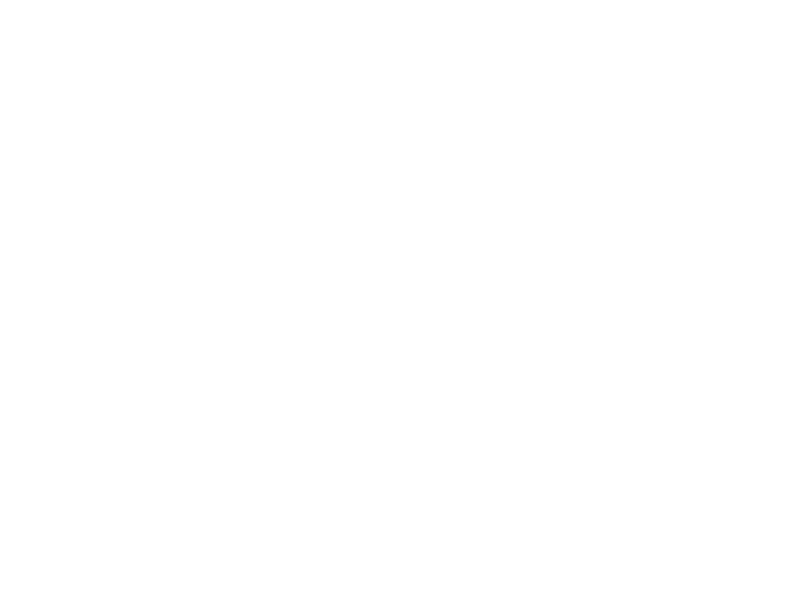

<IPython.core.display.Javascript object>


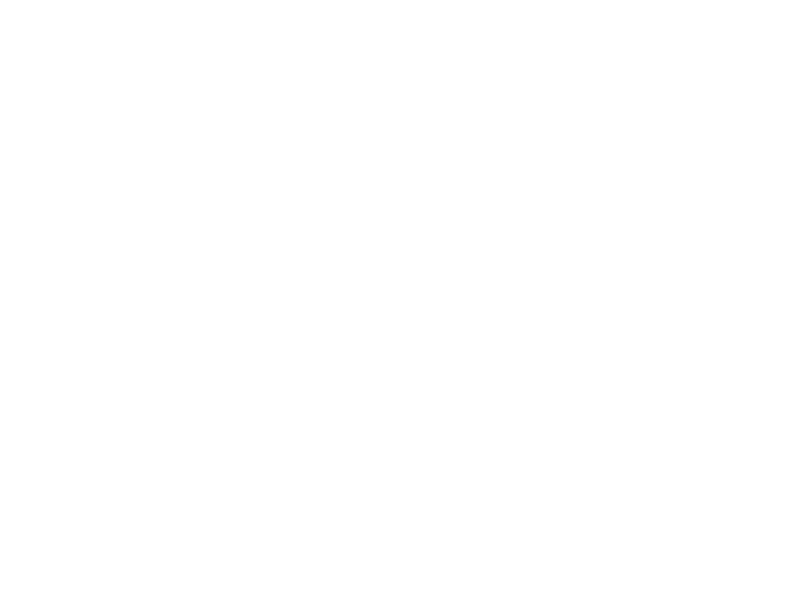

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


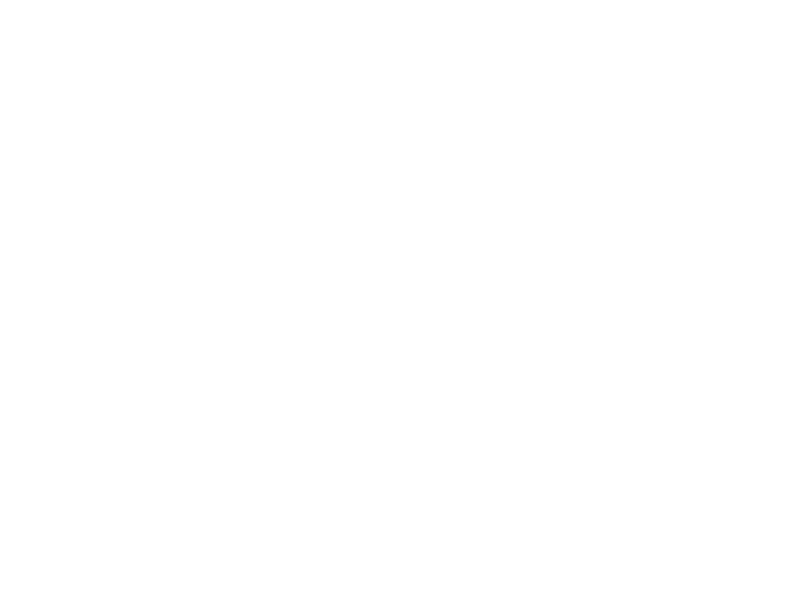

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


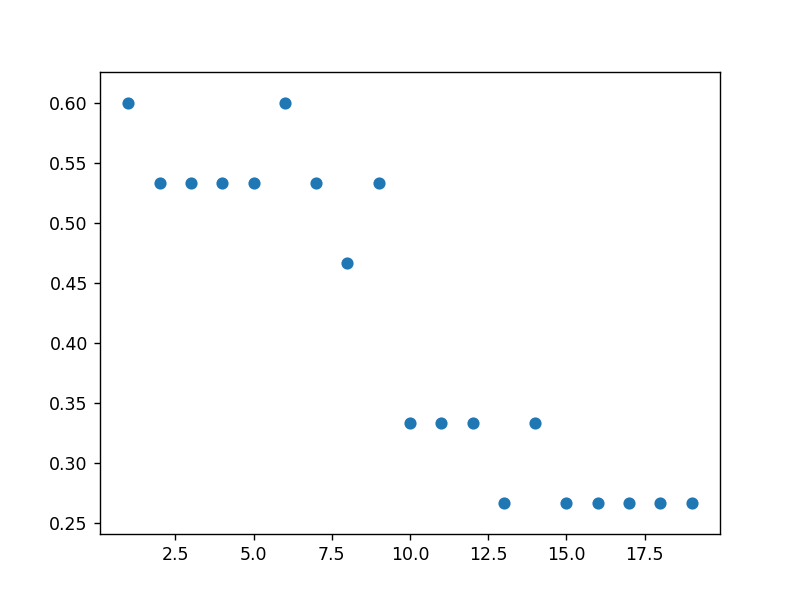

In [18]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

    plt.figure()
plt.scatter(k_range, scores)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


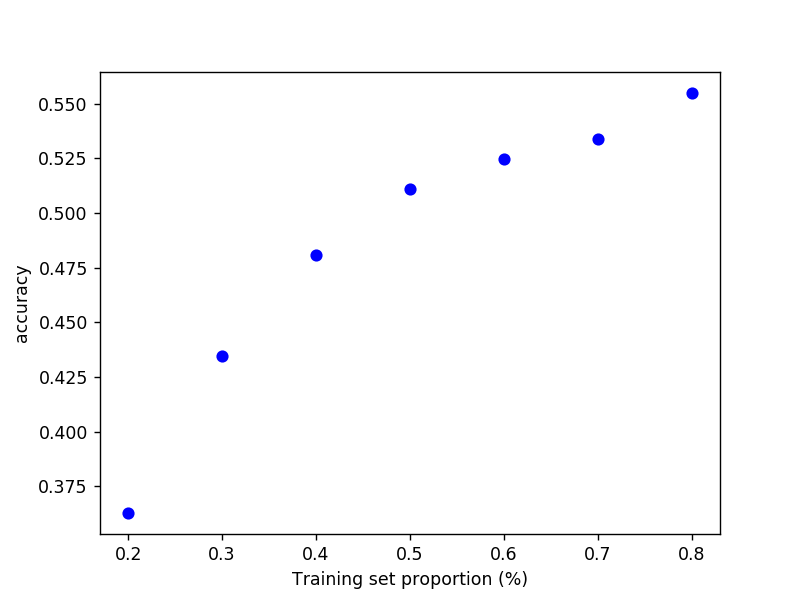

In [21]:
import numpy as np

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1-s)
        knn.fit(X_train, Y_train)
        scores.append(knn.score(X_test, Y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');